In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df = pd.read_csv("modified_dataset.csv")
df['Availibility'] = df['Availibility'].apply(lambda x: 'Yes' if 'Yes' in x else 'No')
df['name'] = [i+1 for i in range(len(df))]
df.to_csv("modified_dataset2.csv",index=False)

In [68]:
df = pd.read_csv("modified_dataset2.csv")
df = df[df['Availibility'] != 'No']
df.to_csv("modified_dataset3.csv",index=False)

In [2]:
df = pd.read_csv("modified_dataset3.csv")
df = df.iloc[:,list(range(5))+[-1]]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.to_csv("updated.csv")

In [3]:
df.head(1)

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),skills,name
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",1


In [4]:
skills_list = df['skills'][0].split(',')
skills_list

['MS-Excel', ' MS-Word', ' Deep Learning', ' MySQL', ' Python', ' SQL']

In [ ]:
error_count=0
for i in range(0,len(df['skills'])-1):
    try:
        skills_list = df['skills'][i].split(',')
        print(i,skills_list)
    except KeyError:
        error_count+=1
        df.drop(i,inplace=True) 
        df.reset_index(drop=True, inplace=True)

In [10]:
error_count

0

In [11]:
req_skills = ['Deep Learning' , 'Machine Learning' , 'Natural Language Processing' , 'Python', 'NLP' , 'AI', 'Artificial Intelligence']

In [ ]:
count=0
count2=0
for i in range(0,len(df['skills'])-1):
    try:
        skills_list = df['skills'][i].split(',')
        filtered_skills = []
        for skill in req_skills:
            if any(substring.strip() in skill for substring in skills_list):
                filtered_skills.append(skill)
        filtered_skills_string = ','.join(filtered_skills)
        df['skills'][i] = filtered_skills
        print(filtered_skills)
        count+= 1
    except KeyError:
        continue
print(count,count2)        

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [17]:
df = df.applymap(lambda x: np.nan if x == [] else x)
df['skills'].isnull().sum()

73

In [18]:
df.dropna(inplace=True)
df.drop(974,inplace=True)
df.reset_index(drop=True, inplace=True)

In [19]:
df

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),skills,name
0,1,0,0,1,"[Deep Learning, Python]",1
1,2,0,0,0,[Python],2
2,2,2,0,0,"[Machine Learning, Python]",3
3,3,2,2,0,"[Machine Learning, Python]",4
4,2,2,0,0,"[Machine Learning, Python]",5
5,2,2,0,2,"[Deep Learning, Machine Learning, Python, Arti...",6
6,2,1,2,0,"[Machine Learning, Python]",7
7,2,2,0,1,"[Deep Learning, Machine Learning, Python]",8
8,2,1,1,0,"[Machine Learning, Python]",9
9,2,2,0,1,"[Deep Learning, Machine Learning, Python, Arti...",10


In [21]:
#skill_data = df[['Python (out of 3)', 'Machine Learning (out of 3)','Natural Language Processing (NLP) (out of 3)','Deep Learning (out of 3)']]


In [123]:
                # Perform Unsupervised Learning
# def kmeans_unsupervised(skill_data):
#     try:
#         scaler = StandardScaler()
#         skills_scaled = scaler.fit_transform(skill_data)
#         kmeans = KMeans(n_clusters=5, random_state=42)
#         kmeans.fit(skills_scaled)
#         df['cluster'] = kmeans.labels_
#         print(df[['name', 'cluster']])
#     except AttributeError as e:
#         print('Error Encountered',e)    

Error Encountered 'NoneType' object has no attribute 'split'


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df['score'] = df['Python (out of 3)'] + df[ 'Machine Learning (out of 3)'] + df['Natural Language Processing (NLP) (out of 3)'] + df['Deep Learning (out of 3)']
df['score'] = df['score']/4
df_sorted = df.sort_values('score', ascending=False)
top_applicants = df_sorted.head(50)
top_applicants

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),skills,name,score
352,3,3,3,3,"[Deep Learning, Machine Learning, Python]",423,3.00
213,3,3,3,3,"[Deep Learning, Machine Learning, Python]",247,3.00
204,3,3,3,3,"[Deep Learning, Machine Learning, Python, Arti...",237,3.00
858,3,3,3,3,"[Deep Learning, Machine Learning, Python]",1010,3.00
19,3,3,3,3,"[Deep Learning, Machine Learning, Python]",21,3.00
917,3,3,3,3,"[Deep Learning, Machine Learning, Python]",1074,3.00
849,3,3,3,3,"[Deep Learning, Machine Learning, Python]",1001,3.00
388,3,3,3,3,"[Deep Learning, Machine Learning, Python]",466,3.00
644,3,3,3,3,"[Deep Learning, Machine Learning, Python, Arti...",768,3.00
473,3,3,3,3,"[Deep Learning, Machine Learning, Python]",564,3.00


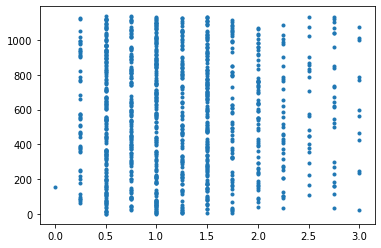

In [24]:
plt.scatter(df['score'],df['name'],marker='.')
plt.show()